In [34]:
# 1、加载图像
import PIL.Image as image
import numpy as np
from sklearn import preprocessing

def load_data(filePath):
    
    # 读取文件
    f = open(filePath,'rb')
    # 得到图像的像素值
    img = image.open(f)
    # 得到图像尺寸
    width, height = img.size
    
    data = []
    for x in range(width):
        for y in range(height):
            
            # 得到点(x,y)的三个通道值
            # R,G,B(0~255)
            c1, c2, c3 = img.getpixel((x, y))
            data.append([c1, c2, c3])
    f.close()
    
    # 采用Min-Max规范化
    transfer = preprocessing.MinMaxScaler()
    data = transfer.fit_transform(data)
    return np.mat(data), width, height

In [35]:
# 1、加载图像，得到规范化的结果img，以及图像尺寸

path = ('/Users/zhangqihao/Desktop/PYTHON/机器学习/机器学习资料6/weixin.jpg')

img, width, height = load_data(path)

In [44]:
# 2、预估器流程
from sklearn.cluster import KMeans

estimator = KMeans(n_clusters=5)
estimator.fit(img)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

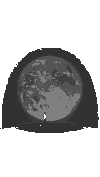

In [45]:
# 3、比较

label = estimator.predict(img)

# 将图像聚类结果，转化成图像尺寸的矩阵
label = label.reshape([width, height])

# 创建个新图像pic_mark，用来保存图像聚类的结果，并设置不同的灰度值
new_picture = image.new("L", (width, height))

for x in range(width):
    for y in range(height):
        # 根据类别设置图像灰度, 类别0 灰度值为255， 类别1 灰度值为127
        new_picture.putpixel((x, y), int(256/(label[x][y]+1))-1)
        
new_picture

In [ ]:
## 更多请见 机器学习资料6